# Decision tree classification

Supevised non-parametric machine learning to classify a bivariate categorical variable.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

The *Heart Disease* dataset from the Cleveland database contains 14 variables from patients to classify the presence or absence of heart disease in a patient (https://archive.ics.uci.edu/dataset/45/heart+disease).

In [2]:
#load the data
df = pd.read_csv("https://raw.githubusercontent.com/dswede43/ML-methods/main/data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#check for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Feature variables (13)

**1. age (continuous):** Age of subject

**2. sex (nominal):** Gender of subject:
0 = female, 1 = male

**3. cp = chest-pain type (nominal):** Type of chest-pain experienced by the individual:
0 = typical angina, 1 = atypical angina, 2 = non-angina pain, 3 = asymptomatic angina

**4. trestbps = Resting Blood Pressure (continuous):** Resting blood pressure in mm Hg

**5. chol = Serum Cholesterol (continuous):** Serum cholesterol in mg/dl

**6. fbs = Fasting Blood Sugar (ordinal):** Fasting blood sugar level relative to 120 mg/dl: 0 = fasting blood sugar <= 120 mg/dl, 1 = fasting blood sugar > 120 mg/dl

**7. restecg = Resting ECG (nominal):** Resting electrocardiographic results
0 = normal, 1 = ST-T wave abnormality, 2 = left ventricle hyperthrophy

**8. thalach = Max Heart Rate Achieved (continuous):** Max heart rate of subject

**9. exang = Exercise Induced Angina (nominal):**
0 = no, 1 = yes

**10. oldpeak = ST Depression Induced by Exercise Relative to Rest (continuous):** ST Depression of subject

**11. slope = Peak Exercise ST Segment (nominal):**
0 = Up-sloaping, 1 = Flat, 2 = Down-sloaping

**12. ca = Number of Major Vessels (0-3) Visible on Flouroscopy (continuous):** Number of visible vessels under flouro

**13. thal = Form of thalassemia (nominal):**
0 = normal, 1 = fixed defect, 2 = reversible defect

### Target variable (1)

**14. target = Diagnosis of Heart Disease:** Indicates whether subject is suffering from heart disease or not
0 = absence, 1 = heart disease present

### Dataset preparation

Define target and feature variable datasets.

In [4]:
#define target and feature variables
target = 'target'
features = [col for col in df.columns if col != target]

#subset data to target and feature datasets
y = df[target]
X = df[features]

Apply one-hot encoding to multivariate features to remove ordinal patterns.

In [5]:
#define multivariate feature variables
multivariates = ['cp',
                 'restecg',
                 'slope',
                 'thal']

#apply one-hot encoding to multivariate features
X_encoded = pd.get_dummies(X, columns = multivariates)
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,1,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,1,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,1,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,1,...,0,1,0,0,1,0,0,0,1,0


## Objective

Create a decision tree classifier ML model to classify the precense of heart disease in a patient.

## Build preliminary classification tree

Create a classification tree using all feature variables.

In [6]:
#split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

#build the preliminary decision tree classifier
prelim_tree = DecisionTreeClassifier(random_state = 42)
prelim_tree = prelim_tree.fit(X_train, y_train)

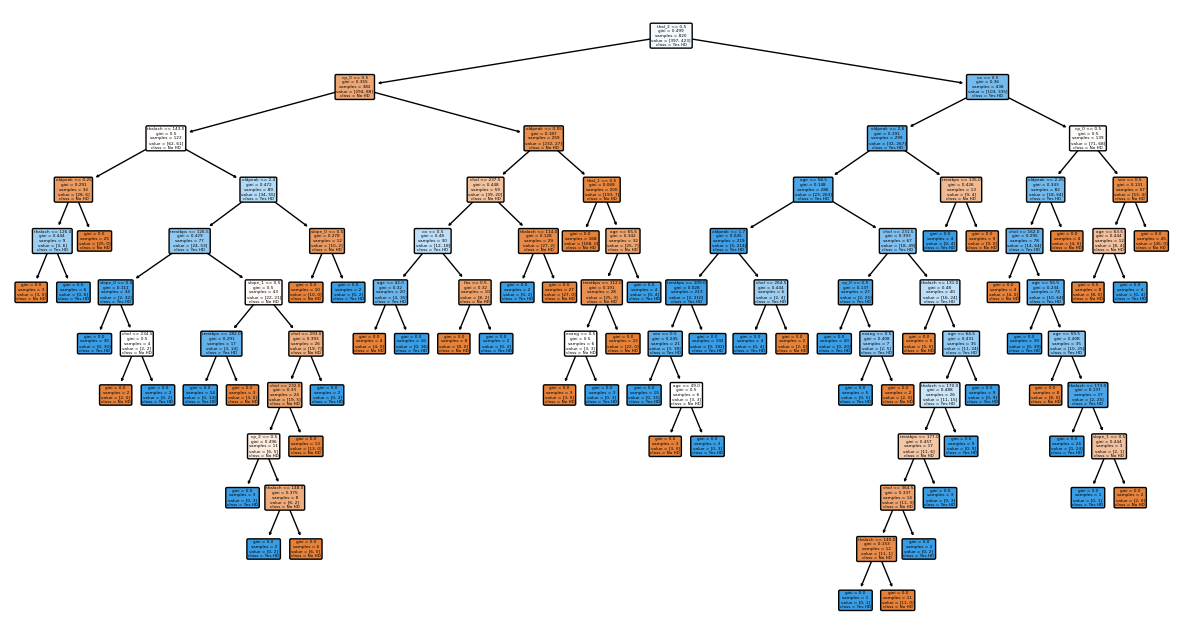

In [7]:
#visualize the decision tree
plt.figure(figsize = (15, 8))
plot_tree(prelim_tree,
          filled = True,
          rounded = True,
          class_names = ["No HD","Yes HD"],
          feature_names = list(X_encoded.columns))
plt.show()

### Confusion matrix for preliminary tree

Visualize the preliminiary model tree performance using a confusion matrix.

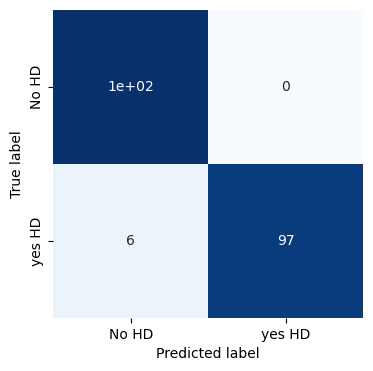

In [8]:
#make model predictions
y_pred = prelim_tree.predict(X_test)

#create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, cmap = 'Blues', cbar = False)
plt.xticks([0.5,1.5], ['No HD','yes HD'])
plt.yticks([0.5,1.5],['No HD','yes HD'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

The preliminary model correctly classified **102/102 (100%)** patients with **no heart disease** and **97/103 (94.2%)** patients with **heart disease**.

## Cost-complexity tree pruning

To simplify the tree model and prevent overfitting of training data.

In [9]:
#determine potential values for alpha
path = prelim_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00162602, 0.00223577, 0.00225836, 0.00229555,
       0.00238334, 0.0028907 , 0.00311914, 0.00326655, 0.00351336,
       0.00372002, 0.00390244, 0.00406504, 0.00446403, 0.00453573,
       0.00454163, 0.00459691, 0.00487805, 0.00497125, 0.00602582,
       0.00675422, 0.00682927, 0.0071736 , 0.00743715, 0.00756177,
       0.00770296, 0.00819272, 0.01014212, 0.01026827, 0.01135529,
       0.01169648, 0.03120598, 0.03955513])

### 10-fold cross-validation to determine the optimal value for alpha

In [10]:
k = 10 #number of cross-validation folds

#10-fold cross-validation to determine the optimal value for alpha
alpha_values = []
for ccp_alpha in ccp_alphas:
    #create tree model
    tree_model = DecisionTreeClassifier(random_state = 42, ccp_alpha = ccp_alpha)
    
    #calculate accuracy scores using cross-validation
    scores = cross_val_score(tree_model, X_train, y_train, cv = k)
    
    #store accuracy results
    alpha_values.append([ccp_alpha, scores.mean(), scores.std()])

alpha_results = pd.DataFrame(alpha_values, columns = ['alpha','mean_accuracy','std_accuracy'])
alpha_results.head()

,alpha,mean_accuracy,std_accuracy
0,0.000000,0.987805,0.014429
1,0.001626,0.969512,0.020588
2,0.002236,0.954878,0.022520
3,0.002258,0.954878,0.022520
4,0.002296,0.954878,0.022520


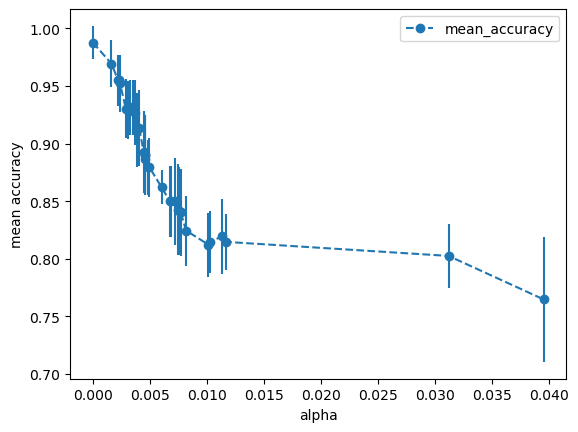

In [14]:
#plot the results
alpha_results.plot(x = 'alpha',
                   y = 'mean_accuracy',
                   yerr = 'std_accuracy',
                   marker = 'o',
                   linestyle = '--')
plt.ylabel('mean accuracy')
plt.show()

In [12]:
#set the optimal value for alpha
optimal_alpha = ccp_alphas[0]
optimal_alpha

0.0

The optimal value for alpha is 0, which shows the greatest predictive accuracy on average. Therefore, no tree pruning is necessary.

## Conclusion

The best performing tree model is the preliminary model with no tree pruning. The average accuracy from cross-validation with this model was 98.8%.